### Part A

In [ ]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

In [1]:
# import the necessary ibraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import random
import warnings
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from matplotlib import pyplot
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
dataset = pd.read_csv('CE802_P2_Data.csv')
dataset.shape
#(features, labels)

(1000, 22)

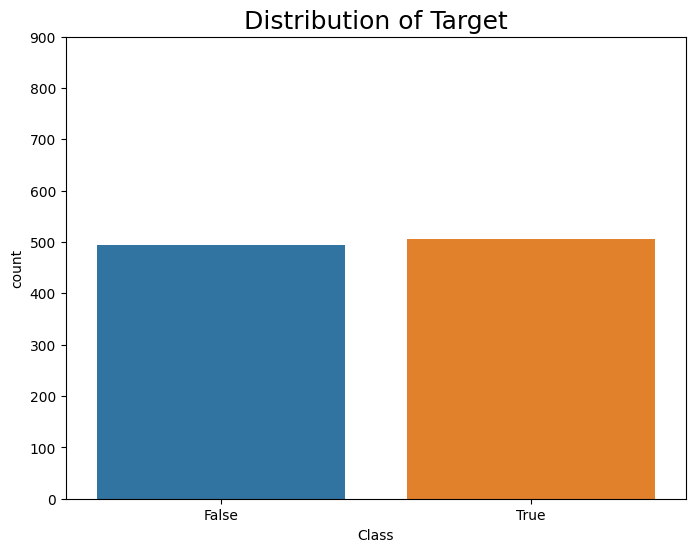

<AxesSubplot: ylabel='Class'>

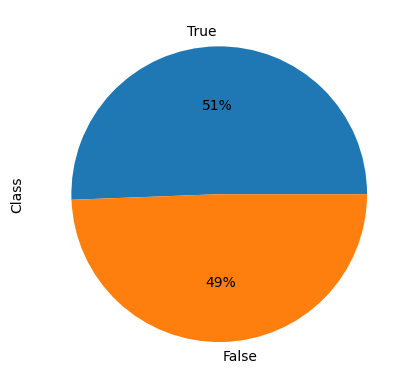

In [25]:
pyplot.figure(figsize=(8,6))
pyplot.title('Distribution of Target', size=18)
sns.countplot(x=dataset['Class'])
pyplot.ylim(0,900)
pyplot.show()

	
dataset['Class'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [26]:
# dataset describe
dataset.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,-28749.730710,1.259000,-5.008527,-7.073618,1787.391510,0.507000,4.314597,16794.708266,0.481000,-10014.212102,...,39.155125,-13.932299,6.097217,15.932875,4.033075,9994.592611,-3750.649178,3.255798,-5066.909169,-10.183520
std,1688.229804,0.499408,1.343875,2.708288,702.890861,0.500201,0.614178,2074.355688,0.499889,1494.941683,...,14.584924,10.285697,1.802407,2.708330,2.609035,1058.036210,739.616151,2.699756,1023.164795,1.062748
min,-81470.290000,0.730000,-15.676000,-17.676000,-1942.650000,0.000000,3.540592,7679.980000,0.000000,-19975.820000,...,-18.360000,-85.560000,4.225980,12.966360,1.266660,3700.240000,-8521.050000,0.334140,-12915.220000,-13.620000
25%,-28720.400000,0.730000,-5.319050,-8.262750,1506.272500,0.000000,3.827700,15994.420000,0.000000,-10175.920000,...,29.930250,-16.732500,4.743650,13.852350,2.079975,9584.540000,-3791.062500,1.150725,-5335.020000,-10.925000
50%,-28701.070500,1.730000,-4.507200,-6.221100,1649.040000,1.000000,4.180750,16381.580000,0.000000,-9636.920000,...,39.270150,-10.862000,5.534500,15.096750,3.267150,9755.930000,-3589.140000,2.384400,-5044.997000,-10.135000
75%,-28682.255000,1.730000,-4.127370,-5.059425,1880.725000,1.000000,4.694500,17021.730000,1.000000,-9383.513500,...,48.359250,-6.972000,6.834000,17.170500,5.188500,10066.240000,-3489.926250,4.704750,-4795.820000,-9.450000
max,-24983.290000,1.730000,-4.040002,-4.206600,6602.350000,1.000000,7.081000,32339.980000,1.000000,-1929.820000,...,86.280000,-3.782328,13.330000,26.424000,14.805000,21124.240000,1171.950000,13.536000,1892.780000,-6.810000


In [27]:
# column informations
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   int64  
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   int64  
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   1000 non-null   bool   
dtypes

In [28]:
# check null values in the dataset

null_values = dataset.isnull().sum().to_frame(name = 'NULL_COUNTS')
null_values = null_values[null_values['NULL_COUNTS']>0]
null_features = null_values.index
print(null_values)

     NULL_COUNTS
F21          500


In [29]:
# search for duplicates in the dataset 
print(dataset.duplicated().sum()) # no duplicate values found

0


In [30]:
# get the features and target into X and y variable
X = dataset.iloc[:, 0:-1]
y =dataset.iloc[:, -1]

In [31]:
# Define various imputation methods to fill null values
imputation_methods = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'most_frequent': SimpleImputer(strategy='most_frequent'),
    'constant': SimpleImputer(strategy='constant', fill_value=0)
}

# Define the classifiers to be experimented to compare
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Define the parameters for each classifiers
param_grid = {
    'Decision Tree': {'classification__max_depth': [3, 5, 7]},
    'K-Nearest Neighbors': {'classification__n_neighbors': [30, 50, 55, 60, 65, 70, 75]},
    'XGBoost': {'classification__max_depth': [3, 5, 7],
                'classification__n_estimators': [50, 100, 200]}
}


for imputation_name, imputer in imputation_methods.items():
    for name, model in classifiers.items():
        pipeline = Pipeline([('imputation', imputer), ('scaling', StandardScaler()), ('classification', model)])
        # Finding the optimal parameters using the GridSearchCV module from Sklearn library
        clf = GridSearchCV(pipeline, param_grid[name], cv=5)
        clf.fit(X, y)
        print(f'{imputation_name} imputation with {name} model best score with standard scaler: {clf.best_score_}')
        print(f'{imputation_name} imputation with {name} model best params with standard scaler: {clf.best_params_}')
        print("="*10)
        print('\n')

mean imputation with Decision Tree model best score with standard scaler: 0.8559999999999999
mean imputation with Decision Tree model best params with standard scaler: {'classification__max_depth': 5}


mean imputation with K-Nearest Neighbors model best score with standard scaler: 0.6839999999999999
mean imputation with K-Nearest Neighbors model best params with standard scaler: {'classification__n_neighbors': 55}


mean imputation with XGBoost model best score with standard scaler: 0.8879999999999999
mean imputation with XGBoost model best params with standard scaler: {'classification__max_depth': 5, 'classification__n_estimators': 200}


median imputation with Decision Tree model best score with standard scaler: 0.859
median imputation with Decision Tree model best params with standard scaler: {'classification__max_depth': 5}


median imputation with K-Nearest Neighbors model best score with standard scaler: 0.684
median imputation with K-Nearest Neighbors model best params with sta

In [32]:
# Splitting the dataset into 80% training and 20% validation
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, train_size=0.8, random_state=100
)

# Define the steps in the pipeline for imputation and scaling
processing = [('imputer', SimpleImputer(strategy='constant', fill_value=0)),
         ('scaler', StandardScaler())]

# Create the pipeline
pipeline = Pipeline(processing)

# Fit the pipeline to the training data
X_train_processed = pipeline.fit_transform(X_train)

# Use the pipeline to transform the validation data
X_valid_processed = pipeline.transform(X_valid)

Precision score : 87.38%
Recall score : 92.78%
F1 score : 90.00%


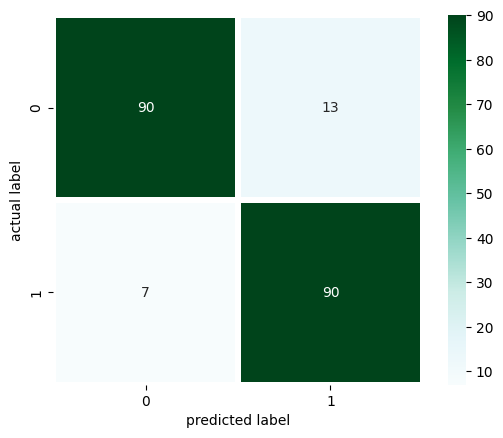

In [33]:
# Decision Tree Classifiers
# Load the model
model_DTC = DecisionTreeClassifier(max_depth= 5)
# fitting the model with the train dataset
model_DTC.fit(X_train_processed,y_train)

# predict on the validation dataste
y_predict_DTC= model_DTC.predict(X_valid_processed)
# predict probabilities
DTC_probs = model_DTC.predict_proba(X_valid_processed)
# keep probabilities for the positive outcome only
DTC_probs = DTC_probs[:, 1]

# Calculating the evaluation matrices, to evaluate model
# precision score
DTC_precision_score = precision_score(y_valid, y_predict_DTC)
print("Precision score : {:.2f}%".format(DTC_precision_score*100))

# Recall score
DTC_recall_score = recall_score(y_valid, y_predict_DTC)
print("Recall score : {:.2f}%".format(DTC_recall_score*100))

# F1 score
DTC_f1_score = f1_score(y_valid, y_predict_DTC)
print("F1 score : {:.2f}%".format(DTC_f1_score*100))

# confusion martrix
cm_DTC = metrics.confusion_matrix(y_valid, y_predict_DTC)
# heatmap confusion matrix 
sns.heatmap(cm_DTC, annot=True, fmt=".0f", linewidths=3, square=True, cmap='BuGn', color="#cd1076")
pyplot.ylabel('actual label')
pyplot.xlabel('predicted label')

pyplot.show()

Precision score : 72.06%
Recall score : 50.52%
F1 score : 59.39%


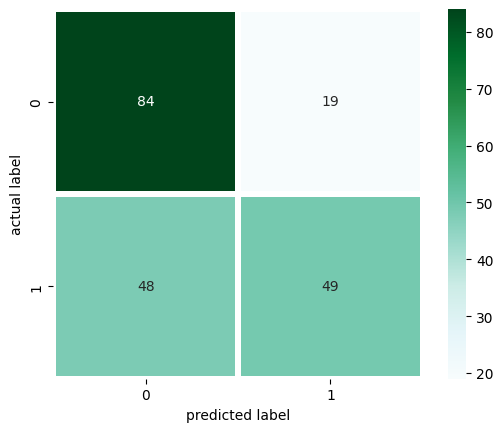

In [34]:
# K-nearest Neighbour clasifier
# Load the model

model_knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 55)
model_knn.fit(X_train_processed,y_train)
# predict on the validation dataste
y_predict_knn= model_knn.predict(X_valid_processed)
# predict probabilities
knn_probs = model_knn.predict_proba(X_valid_processed)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]

# Calculating the evaluation matrices, to evaluate model
# precision score
knn_precision_score = precision_score(y_valid, y_predict_knn)
print("Precision score : {:.2f}%".format(knn_precision_score*100))

# Recall score
knn_recall_score = recall_score(y_valid, y_predict_knn)
print("Recall score : {:.2f}%".format(knn_recall_score*100))

# F1 score
knn_f1_score = f1_score(y_valid, y_predict_knn)
print("F1 score : {:.2f}%".format(knn_f1_score*100))

# confusion martrix
cm_KNN = metrics.confusion_matrix(y_valid, y_predict_knn)
# heatmap confusion matrix 
sns.heatmap(cm_KNN, annot=True, fmt=".0f", linewidths=3, square=True, cmap='BuGn', color="#cd1076")
pyplot.ylabel('actual label')
pyplot.xlabel('predicted label')

pyplot.show()

Precision score : 91.84%
Recall score : 92.78%
F1 score : 92.31%


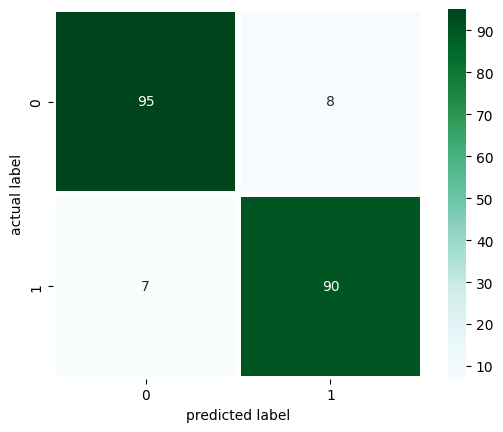

In [35]:
# XGBoot clasifier
# Load the model
model_xgb = xgb.XGBClassifier(max_depth =  7, n_estimators= 50)

# Fitting the model with the training dataset
model_xgb.fit(X_train_processed, y_train)

# predict on the validation dataste
y_predict_xgb= model_xgb.predict(X_valid_processed)
# predict probabilities
xgb_probs = model_xgb.predict_proba(X_valid_processed)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]

# Calculating the evaluation matrices, to evaluate model
# precision score
xgb_precision_score = precision_score(y_valid, y_predict_xgb)
print("Precision score : {:.2f}%".format(xgb_precision_score*100))

# Recall score
xgb_recall_score = recall_score(y_valid, y_predict_xgb)
print("Recall score : {:.2f}%".format(xgb_recall_score*100))

# F1 score
xgb_f1_score = f1_score(y_valid, y_predict_xgb)
print("F1 score : {:.2f}%".format(xgb_f1_score*100))

# confusion martrix
cm_xgb = metrics.confusion_matrix(y_valid, y_predict_xgb)
# heatmap confusion matrix 
sns.heatmap(cm_xgb, annot=True, fmt=".0f", linewidths=3, square=True, cmap='BuGn', color="#cd1076")
pyplot.ylabel('actual label')
pyplot.xlabel('predicted label')

pyplot.show()

In [36]:
# read the test dataset
test_df = pd.read_csv('CE802_P2_Test.csv')

# check for null values in the test dataset
null_values = test_df.isnull().sum().to_frame(name = 'NULL_COUNTS')
null_values = null_values[null_values['NULL_COUNTS']>0]
null_features = null_values.index
# print counts of null values in each column, if any
null_values

,NULL_COUNTS
F21,500
Class,1000


### Part B

In [37]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

# As we found 1 of the column with missing values
# we imput the missing values with  constant value with 0
# Apply preprocessing
# Use the pipeline to transform the validation data
test_data_processed = pipeline.transform(test_data)
predicted = model_xgb.predict(test_data_processed)# CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)... 

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted
# # Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])